<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Изменение-веса-классов" data-toc-modified-id="Изменение-веса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение веса классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

## Подготовка данных

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('Churn.csv')
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None) 

Изучим датасет:

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Проверим, есть ли дубликаты:

In [7]:
df.duplicated().sum()

0

Проверим значения столбцов:

In [8]:
# Для отображения всех столбцов сделаем цикл, который выводит каждый столобец по очереди 
# (его уникальные значения и их количество)
def columns_info(data_frame):
    for column in data_frame.columns:
        print(column)
        display(data_frame[column].value_counts())  
        display(data_frame[column].unique()) 
        print()

In [1]:
#columns_info(df)

Подсчитаем количество пропусков:

In [10]:
display(df.isna().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [11]:
display(df[df['Tenure'].isna()].head(15))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
82,83,15641732,Mills,543,France,Female,36,NaN,0.00,2,0,0,26019.59,0
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
94,95,15676966,Capon,730,Spain,Male,42,NaN,0.00,2,0,1,85982.47,0
99,100,15633059,Fanucci,413,France,Male,34,NaN,0.00,2,0,0,6534.18,0
111,112,15665790,Rowntree,538,Germany,Male,39,NaN,108055.10,2,1,0,27231.26,0


Так ка столбец `'Tenure'` показывает, сколько лет человек является клиентом банка, нет воможности восстановить пропуски по другим данным. Проанализировав другие столбцы строк, где есть пропуски в данном столбце, заполнять просто 0 не целесообразно, т.к. есть значения в столбцах `'Balance'`, `'NumOfProducts'` и т.д., поэтому заполним пропуски медианой, равной 5.

In [12]:
df['Tenure']=df['Tenure'].fillna(5)

In [13]:
df['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Первые 3 столбца, а именно: `'RowNumber'`, `'CustomerId'`, `'Surname'` не влияют на то, уйдет клиент из банка или нет, поэтому их можно удалить:

In [14]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Преобразуем категориальные фичи с помощью ONE и чтобы не попасть в Дамми-ловушку, удалим первый столбец каждой фичи:

In [16]:
df_processed = pd.get_dummies(df, drop_first=True)

In [17]:
df_processed.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null float64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


### Вывод

Была проведена подготовка данных к дальнейшему исследованию:

* Найдены пропуски
* Пропуски заменены медианой
* Удалены ненужные признаки
* Категориальные признаки преобразованы с помощью OHE 

## Исследование задачи

Извлечем целевой признак и признаки для обучения:

In [19]:
features = df_processed.drop(['Exited'], axis=1) # признаки
target = df_processed['Exited'] # целевой признак

Так как спрятанной тестовой выборки нет, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны.

Исходные данные разобъем в соотношении 3:1:1:


In [20]:
features_train, features_part, target_train, target_part = train_test_split(
   features, target, test_size=0.4, random_state=12345)

In [21]:
features_valid, features_test, target_valid, target_test = train_test_split(
   features_part, target_part, test_size=0.5, random_state=12345)

Проверим размеры получившихся выборок:

In [22]:
print(features_train.shape)
print(target_train.shape)
print()
print(features_valid.shape)
print(target_valid.shape)
print()
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)

(2000, 11)
(2000,)

(2000, 11)
(2000,)


Для прогнозирования уйдет ли клиент банка, нужно понять соотношение оставшихся и ушедших клиентов, а также построить модели.

0    0.7963
1    0.2037
Name: Exited, dtype: float64

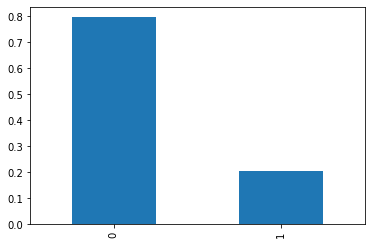

In [23]:
display(target.value_counts(normalize=True))
target.value_counts(normalize=True).plot(kind='bar')

Соотношение 1:4. 

Сначала построим модели без учета дисбаланса классов.

Отмасштабируем признаки:

In [24]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',]

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

### Дерево решений

Создадим модель DecisionTreeClassifier и выберем лучшую модель в зависимости от глубины:

In [26]:
%%time

best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
for depth_dt in range(1, 15):
    model_dt = DecisionTreeClassifier(random_state=2, max_depth=depth_dt, min_samples_leaf=3) 
    model_dt.fit(features_train, target_train) 
    predictions_dt = model_dt.predict(features_valid) 
    result_dt = f1_score(target_valid, predictions_dt)
    if result_dt > best_result_dt:
        best_model_dt = model_dt
        best_result_dt = result_dt
        best_depth_dt = depth_dt
                
print("depth =", best_depth_dt)       
print("F-1 лучшей модели на валидационной выборке:", best_result_dt)

depth = 6
F-1 лучшей модели на валидационной выборке: 0.575301204819277
CPU times: user 237 ms, sys: 0 ns, total: 237 ms
Wall time: 236 ms


Проверим значения других метрик:

In [27]:
predictions_dt = best_model_dt.predict(features_valid)

print('Accuracy', accuracy_score(target_valid, predictions_dt))
print('Precision', precision_score(target_valid, predictions_dt))
print('Recall', recall_score(target_valid, predictions_dt))
print('F-1', f1_score(target_valid, predictions_dt))
probabilities_valid = best_model_dt.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid))

Accuracy 0.859
Precision 0.7764227642276422
Recall 0.4569377990430622
F-1 0.575301204819277
AUC-ROC 0.8250087709216726


### Случайный лес

Создадим модель RandomForestClassifier и выберем лучшую модель в зависимости от глубины и количества деревьев:

In [28]:
%%time # 1-1.5 минуты
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for est_rf in range(50, 70):  
    for depth_rf in range (10, 20): 
        model_rf = RandomForestClassifier(random_state=2761, min_samples_leaf=3, n_estimators=est_rf, max_depth=depth_rf)
        model_rf.fit(features_train, target_train) 
        predictions_rf = model_rf.predict(features_valid) 
        result_rf = f1_score(target_valid, predictions_rf)
        
        if result_rf > best_result_rf:
            best_model_rf = model_rf
            best_result_rf = result_rf
            best_est_rf = est_rf
            best_depth_rf = depth_rf
            
print("depth =", best_depth_rf,"estimators =", best_est_rf)       
print("F-1 лучшей модели на валидационной выборке:", best_result_rf)

depth = 17 estimators = 63
F-1 лучшей модели на валидационной выборке: 0.5907046476761619
CPU times: user 1min 6s, sys: 0 ns, total: 1min 6s
Wall time: 1min 6s


In [29]:
predictions_rf = best_model_rf.predict(features_valid)

print('Accuracy', accuracy_score(target_valid, predictions_rf))
print('Precision', precision_score(target_valid, predictions_rf))
print('Recall', recall_score(target_valid, predictions_rf))
print('F-1', f1_score(target_valid, predictions_rf))
probabilities_valid_rf = best_model_rf.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_rf))

Accuracy 0.8635
Precision 0.7911646586345381
Recall 0.47129186602870815
F-1 0.5907046476761619
AUC-ROC 0.8459939571374131


### Логистическая регрессия

Создадим модель LogisticRegression и проверим метрику качества:

In [30]:
model_lr = LogisticRegression(random_state=2761, solver='liblinear')
model_lr.fit(features_train, target_train) 
predictions_lr = model_lr.predict(features_valid)
result_lr = f1_score(target_valid, predictions_lr) 

print("F-1 модели логистической регрессии на валидационной выборке:", result_lr)

F-1 модели логистической регрессии на валидационной выборке: 0.33108108108108103


### Вывод

* Данные были разбиты на 3 части (тренировочная, валидационная и тестовая)
* Был выявлен дисбаланс классов (класс "0" - 80% данных, класс "1" - 20% данных)
* Было построено 3 модели
* Лучшая модель - Случайный лес показала значение F-1 на валидационной выборке 0.5907

## Борьба с дисбалансом

### Изменение веса классов

Теперь добавим бóльший вес редкому классу (в нашем случае классу "1"):

In [31]:
%%time

model_dt_b = DecisionTreeClassifier(random_state=2, max_depth=6,min_samples_leaf=3, class_weight='balanced') 
model_dt_b.fit(features_train, target_train) 
predictions_dt_b = model_dt_b.predict(features_valid) 
result_dt_b = f1_score(target_valid, predictions_dt_b)
print('Дерево решений')
print('Accuracy', accuracy_score(target_valid, predictions_dt_b))
print('Precision', precision_score(target_valid, predictions_dt_b))
print('Recall', recall_score(target_valid, predictions_dt_b))
print('F-1', result_dt_b)
probabilities_valid_dt_b = model_dt_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_dt_b))
print()

model_rf_b = RandomForestClassifier(random_state=2761, min_samples_leaf=3, n_estimators=63, max_depth=17, class_weight='balanced')
model_rf_b.fit(features_train, target_train) 
predictions_rf_b = model_rf_b.predict(features_valid) 
result_rf_b = f1_score(target_valid, predictions_rf_b)
print('Случайный лес')
print('Accuracy', accuracy_score(target_valid, predictions_rf_b))
print('Precision', precision_score(target_valid, predictions_rf_b))
print('Recall', recall_score(target_valid, predictions_rf_b))
print('F-1', result_rf_b)
probabilities_valid_rf_b = model_rf_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_rf_b))
print()

model_lr_b = LogisticRegression(random_state=2761, solver='liblinear', class_weight='balanced')
model_lr_b.fit(features_train, target_train) 
predictions_lr_b = model_lr_b.predict(features_valid)
result_lr_b = f1_score(target_valid, predictions_lr_b) 
print('Логистическая регрессия')
print('Accuracy', accuracy_score(target_valid, predictions_lr_b))
print('Precision', precision_score(target_valid, predictions_lr_b))
print('Recall', recall_score(target_valid,predictions_lr_b))
print('F-1', result_lr_b)
probabilities_valid_lr_b = model_lr_b.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_lr_b))

Дерево решений
Accuracy 0.77
Precision 0.4674922600619195
Recall 0.722488038277512
F-1 0.5676691729323309
AUC-ROC 0.8170136221486942

Случайный лес
Accuracy 0.8485
Precision 0.6584022038567493
Recall 0.5717703349282297
F-1 0.6120358514724713
AUC-ROC 0.8462086934956055

Логистическая регрессия
Accuracy 0.702
Precision 0.3810160427807487
Recall 0.6818181818181818
F-1 0.4888507718696398
AUC-ROC 0.7637310291013133
CPU times: user 482 ms, sys: 60.6 ms, total: 542 ms
Wall time: 511 ms


У дерева решений значение f-1 уменьшилось (было 0.5753 стало 0.5677), у логистической регрессии (было 0.3311 стало 0.4889) и случайного леса (было 0.5925 стало 0.612) увеличилось.

Построим ROC-кривую, чтобы визуализировать и сравнить модели:

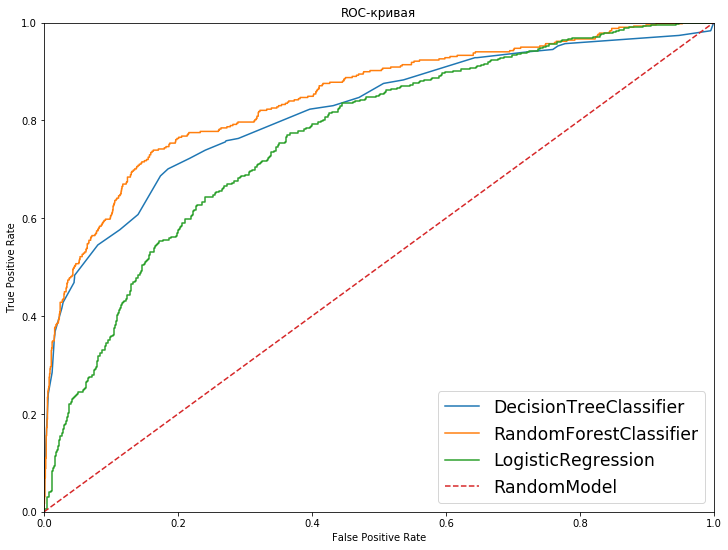

In [32]:
fpr_dt_b, tpr_dt_b, thresholds_dt_b = roc_curve(target_valid, probabilities_valid_dt_b) 
fpr_rf_b, tpr_rf_b, thresholds_rf_b = roc_curve(target_valid, probabilities_valid_rf_b)
fpr_lr_b, tpr_lr_b, thresholds_lr_b = roc_curve(target_valid, probabilities_valid_lr_b)

plt.figure(figsize=[12,9])
plt.plot(fpr_dt_b, tpr_dt_b, label='DecisionTreeClassifier')
plt.plot(fpr_rf_b, tpr_rf_b, label='RandomForestClassifier')
plt.plot(fpr_lr_b, tpr_lr_b, label='LogisticRegression')

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel') # ROC-кривая случайной модели (выглядит как прямая)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.legend(loc='lower right', fontsize='xx-large')
plt.show()

### Увеличение выборки

Напишем функцию, которая увеличит значения класса "1" до примерного баланса классов:

In [33]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [34]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())

0    4804
1    4784
Name: Exited, dtype: int64


Проверим модели с подобранными гиперпараметрами на сбалансированной выборке:

In [35]:
%%time

model_dt_u = DecisionTreeClassifier(random_state=2, max_depth=6, min_samples_leaf=3) 
model_dt_u.fit(features_upsampled, target_upsampled) 
predictions_dt_u = model_dt_u.predict(features_valid) 
result_dt_u = f1_score(target_valid, predictions_dt_u)
print('Дерево решений')
print('Accuracy', accuracy_score(target_valid, predictions_dt_u))
print('Precision', precision_score(target_valid, predictions_dt_u))
print('Recall', recall_score(target_valid, predictions_dt_u))
print('F-1', result_dt_u)
probabilities_valid_dt_u = model_dt_u.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_dt_u))
print()
model_rf_u = RandomForestClassifier(random_state=2761, min_samples_leaf=3, n_estimators=63, max_depth=17)
model_rf_u.fit(features_upsampled, target_upsampled) 
predictions_rf_u = model_rf_u.predict(features_valid) 
result_rf_u = f1_score(target_valid, predictions_rf_u)
print('Случайный лес')
print('Accuracy', accuracy_score(target_valid, predictions_rf_u))
print('Precision', precision_score(target_valid, predictions_rf_u))
print('Recall', recall_score(target_valid, predictions_rf_u))
print('F-1', result_rf_u)
probabilities_valid_rf_u = model_rf_u.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_rf_u))
print()
model_lr_u = LogisticRegression(random_state=2761, solver='liblinear')
model_lr_u.fit(features_upsampled, target_upsampled) 
predictions_lr_u = model_lr_u.predict(features_valid)
result_lr_u = f1_score(target_valid, predictions_lr_u) 
print('Логистическая регрессия')
print('Accuracy', accuracy_score(target_valid, predictions_lr_u))
print('Precision', precision_score(target_valid, predictions_lr_u))
print('Recall', recall_score(target_valid,predictions_lr_u))
print('F-1', result_lr_u)
probabilities_valid_lr_u = model_lr_u.predict_proba(features_valid)[:, 1]
print("AUC-ROC", roc_auc_score(target_valid, probabilities_valid_lr_u))

Дерево решений
Accuracy 0.769
Precision 0.46594427244582043
Recall 0.7200956937799043
F-1 0.5657894736842105
AUC-ROC 0.8135687670503693

Случайный лес
Accuracy 0.8355
Precision 0.6032482598607889
Recall 0.6220095693779905
F-1 0.6124852767962308
AUC-ROC 0.8425906883056393

Логистическая регрессия
Accuracy 0.702
Precision 0.3810160427807487
Recall 0.6818181818181818
F-1 0.4888507718696398
AUC-ROC 0.7636478565682107
CPU times: user 653 ms, sys: 48.3 ms, total: 702 ms
Wall time: 676 ms


Увеличение выборки незначительно уменьшило все показатели.

Можно попробовать уменьшить строки с классом "0", но, скорее всего, значения будут также уменьшаться как при увеличении класса "1".

### Изменение порога

Изменим значение порога и посмотрим, какими станут метрики.

In [36]:
def change_threshold(probabilities_one_valid):
    best_model = None
    best_result = 0
    for threshold in np.arange(0, 0.6, 0.05):
        predicted_valid = probabilities_one_valid > threshold 
        f1 = f1_score(target_valid, predicted_valid)
        print("Порог = {:.2f} | F-1 = {:.3f}".format(threshold, f1))
        if f1 > best_result:
            best_model_dt = model_dt
            best_result_dt = result_dt
            best_depth_dt = depth_dt

In [37]:
model_dt_p = DecisionTreeClassifier(random_state=2, max_depth=6, min_samples_leaf=3) 
model_dt_p.fit(features_train, target_train) 
predictions_dt_p = model_dt_u.predict_proba(features_valid) 
probabilities_one_valid_dt = predictions_dt_p[:, 1]
print('Дерево решений')
change_threshold(probabilities_one_valid_dt)

Дерево решений
Порог = 0.00 | F-1 = 0.341
Порог = 0.05 | F-1 = 0.390
Порог = 0.10 | F-1 = 0.390
Порог = 0.15 | F-1 = 0.423
Порог = 0.20 | F-1 = 0.424
Порог = 0.25 | F-1 = 0.478
Порог = 0.30 | F-1 = 0.493
Порог = 0.35 | F-1 = 0.495
Порог = 0.40 | F-1 = 0.531
Порог = 0.45 | F-1 = 0.542
Порог = 0.50 | F-1 = 0.566
Порог = 0.55 | F-1 = 0.582


In [38]:
model_rf_p = RandomForestClassifier(random_state=2761, min_samples_leaf=3, n_estimators=63, max_depth=17)
model_rf_p.fit(features_train, target_train) 
predictions_rf_p = model_rf_p.predict_proba(features_valid) 
probabilities_one_valid_rf = predictions_rf_p[:, 1]
print('Случайный лес')
change_threshold(probabilities_one_valid_rf)

Случайный лес
Порог = 0.00 | F-1 = 0.348
Порог = 0.05 | F-1 = 0.414
Порог = 0.10 | F-1 = 0.484
Порог = 0.15 | F-1 = 0.542
Порог = 0.20 | F-1 = 0.587
Порог = 0.25 | F-1 = 0.627
Порог = 0.30 | F-1 = 0.616
Порог = 0.35 | F-1 = 0.621
Порог = 0.40 | F-1 = 0.620
Порог = 0.45 | F-1 = 0.601
Порог = 0.50 | F-1 = 0.591
Порог = 0.55 | F-1 = 0.556


In [39]:
model_lr_p = LogisticRegression(random_state=2761, solver='liblinear')
model_lr_p.fit(features_train, target_train) 
predictions_lr_p = model_lr_p.predict_proba(features_valid)
probabilities_one_valid_lr = predictions_lr_p[:, 1]
print('Логистическая регрессия')
change_threshold(probabilities_one_valid_lr)

Логистическая регрессия
Порог = 0.00 | F-1 = 0.346
Порог = 0.05 | F-1 = 0.379
Порог = 0.10 | F-1 = 0.423
Порог = 0.15 | F-1 = 0.462
Порог = 0.20 | F-1 = 0.478
Порог = 0.25 | F-1 = 0.499
Порог = 0.30 | F-1 = 0.484
Порог = 0.35 | F-1 = 0.454
Порог = 0.40 | F-1 = 0.398
Порог = 0.45 | F-1 = 0.367
Порог = 0.50 | F-1 = 0.331
Порог = 0.55 | F-1 = 0.270


При изменении порога модели случайного леса, равного 0.25 значение F-1 = 0.627, при изменении порога модели логистической регрессии, равного 0.25 значение F-1 = 0.499,в модели дерева решений при пороге = 0.55 значение F-1 = 0.582.

### Вывод

Для борьбы с дисбалансом классов были использованы следующие способы и получены следующие значения:


1. При изменении весов:

* У дерева решений значение f-1 уменьшилось (по сравнению с моделью без изменения веса класса, было 0.5753 стало 0.5677)
* У логистической регрессии f-1 увеличилось (по сравнению с моделью без изменения веса класса, было 0.3311 стало 0.4889) 
* У случайного леса f-1 увеличилось (по сравнению с моделью без изменения веса класса, было 0.5925 стало 0.6175) 

2. При увеличении выборки показатели F-1 всех моделей уменьшились.


3. При изменении порога:
 
* При изменении порога модели случайного леса, равного 0.25 значение F-1 = 0.627
* При изменении порога модели логистической регрессии, равного 0.25 значение F-1 = 0.499
* В модели дерева решений при пороге = 0.55 значение F-1 = 0.582

## Тестирование модели

Проверим модель случайного леса с подобранными гиперпараметрами и учетом веса классов на тестовой выборке:

In [58]:
predictions_rf_test = model_rf_b.predict(features_test)
result_rf_test = f1_score(target_test, predictions_rf_test)
probabilities_rf_test = model_rf_b.predict_proba(features_test)[:, 1]
print('F-1 модели случайного леса на тестовой выборке',result_rf_test)
print("AUC-ROC", roc_auc_score(target_test, probabilities_rf_test))

F-1 модели случайного леса на тестовой выборке 0.6145833333333333
AUC-ROC 0.852744310575636


Попробуем подобрать другие гиперпараметры для улучшения модели:

In [42]:
%%time # 1-1.5 минуты

for est in range(10, 500, 10):
    model =  RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_leaf=3, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('estimators =', est,"F-1 лучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

estimators = 10 F-1 лучшей модели на валидационной выборке: 0.6185044359949303
estimators = 20 F-1 лучшей модели на валидационной выборке: 0.592020592020592
estimators = 30 F-1 лучшей модели на валидационной выборке: 0.6020671834625323
estimators = 40 F-1 лучшей модели на валидационной выборке: 0.6113989637305699
estimators = 50 F-1 лучшей модели на валидационной выборке: 0.6219354838709678
estimators = 60 F-1 лучшей модели на валидационной выборке: 0.6219354838709678
estimators = 70 F-1 лучшей модели на валидационной выборке: 0.6262886597938144
estimators = 80 F-1 лучшей модели на валидационной выборке: 0.6246786632390746
estimators = 90 F-1 лучшей модели на валидационной выборке: 0.6229086229086229
estimators = 100 F-1 лучшей модели на валидационной выборке: 0.6219354838709678
estimators = 110 F-1 лучшей модели на валидационной выборке: 0.6185567010309277
estimators = 120 F-1 лучшей модели на валидационной выборке: 0.6199740596627755
estimators = 130 F-1 лучшей модели на валидационно

При проверке результатов на сервере jupyter hub значения на валидационной выборке немного поменялись, но на тесте немного увеличились, поэтому я их оставила, поменяла только параметр max_depth.

In [51]:
for est in range(120, 136): 
    model =  RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_leaf=3, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    print('estimators =', est,"F-1 лучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

estimators = 120 F-1 лучшей модели на валидационной выборке: 0.6199740596627755
estimators = 121 F-1 лучшей модели на валидационной выборке: 0.6191709844559585
estimators = 122 F-1 лучшей модели на валидационной выборке: 0.6165803108808291
estimators = 123 F-1 лучшей модели на валидационной выборке: 0.6219354838709678
estimators = 124 F-1 лучшей модели на валидационной выборке: 0.6203346203346202
estimators = 125 F-1 лучшей модели на валидационной выборке: 0.6193548387096773
estimators = 126 F-1 лучшей модели на валидационной выборке: 0.616774193548387
estimators = 127 F-1 лучшей модели на валидационной выборке: 0.6201550387596899
estimators = 128 F-1 лучшей модели на валидационной выборке: 0.6201550387596899
estimators = 129 F-1 лучшей модели на валидационной выборке: 0.6193548387096773
estimators = 130 F-1 лучшей модели на валидационной выборке: 0.6201550387596899
estimators = 131 F-1 лучшей модели на валидационной выборке: 0.6201550387596899
estimators = 132 F-1 лучшей модели на вал

In [52]:
 for depth in range (1, 20): 
    model = RandomForestClassifier(random_state=12345, min_samples_leaf=3, n_estimators=128, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train) 
    predicted_valid = model.predict(features_valid)
    print('max_depth =', depth,"F-1 лучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))

max_depth = 1 F-1 лучшей модели на валидационной выборке: 0.5432780847145487
max_depth = 2 F-1 лучшей модели на валидационной выборке: 0.572232645403377
max_depth = 3 F-1 лучшей модели на валидационной выборке: 0.5921052631578947
max_depth = 4 F-1 лучшей модели на валидационной выборке: 0.605593056894889
max_depth = 5 F-1 лучшей модели на валидационной выборке: 0.603515625
max_depth = 6 F-1 лучшей модели на валидационной выборке: 0.6155398587285571
max_depth = 7 F-1 лучшей модели на валидационной выборке: 0.6201058201058202
max_depth = 8 F-1 лучшей модели на валидационной выборке: 0.6244635193133048
max_depth = 9 F-1 лучшей модели на валидационной выборке: 0.6243032329988851
max_depth = 10 F-1 лучшей модели на валидационной выборке: 0.627906976744186
max_depth = 11 F-1 лучшей модели на валидационной выборке: 0.6187050359712231
max_depth = 12 F-1 лучшей модели на валидационной выборке: 0.6280193236714976
max_depth = 13 F-1 лучшей модели на валидационной выборке: 0.6254635352286774
max_d

In [25]:
model =  RandomForestClassifier(random_state=12345, n_estimators=128, min_samples_leaf=3,max_depth=18, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F-1 лучшей модели на валидационной выборке:", f1_score(target_valid, predicted_valid))
print()


predictions_test = model.predict(features_test)
result_test = f1_score(target_test, predictions_test)
print('Accuracy модели случайного леса на тестовой выборке', accuracy_score(target_test, predictions_test))
print('Precision модели случайного леса на тестовой выборке', precision_score(target_test, predictions_test))
print('Recall модели случайного леса на тестовой выборке', recall_score(target_test, predictions_test))
print('F-1 модели случайного леса на тестовой выборке', result_test)
probabilities_test = model.predict_proba(features_test)[:, 1]
print("AUC-ROC на тестовой выборке", roc_auc_score(target_test, probabilities_test))

F-1 лучшей модели на валидационной выборке: 0.6290115532734274

Accuracy модели случайного леса на тестовой выборке 0.8495
Precision модели случайного леса на тестовой выборке 0.6713483146067416
Recall модели случайного леса на тестовой выборке 0.5650118203309693
F-1 модели случайного леса на тестовой выборке 0.613607188703466
AUC-ROC на тестовой выборке 0.8544817568144919


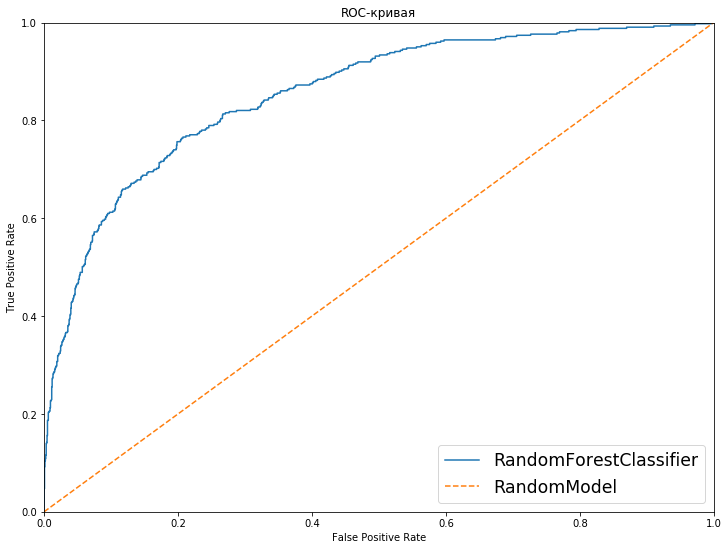

In [26]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test) 

plt.figure(figsize=[12,9])
plt.plot(fpr, tpr, label='RandomForestClassifier')

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel') # ROC-кривая случайной модели (выглядит как прямая)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC-кривая')
plt.legend(loc='lower right', fontsize='xx-large')
plt.show()

### Вывод

Подобрав лучшие гиперпараметры модели случайного леса, получились следующие значения показателей на тестовой выборке:
* F-1 - 0.6136
* AUC-ROC - 0.8545

## Вывод

Для решения задачи прогнозирования оттока клиентов были построены модели дерева решений, случайного леса и логистической регрессии сначала без учета дисбаланса классов. Дисбаланс был исправлен разными методами, метод добавления веса для класса, который встречается реже дал улучшение F-1-меры.

Полученная модель случайного леса со взвешенными классами показала значение F-1-меры, равное 0,6136. Также модель показала себя лучше случайной, значение AUC-ROC равно 0,8545 (у случайной модели этот показатель равен 0,5). 
Точность модели достигает 0,85, Precision равен 0.67, а Recall равен 0.565, значит модель делает высокоточные предсказания, определяя, уйдет ли клиент из банка.

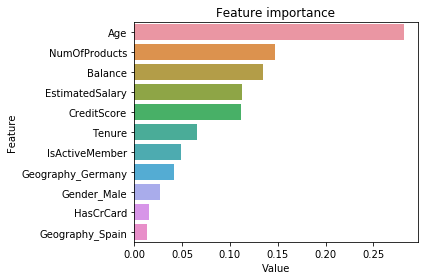

In [27]:
import seaborn as sns
feature_importance = model.feature_importances_
feature_imp = pd.DataFrame(sorted(zip(feature_importance, features.columns)), columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature importance')
plt.tight_layout()
plt.show();